In [1]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('hr-data.csv')

In [3]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 11)

In [5]:
df['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [6]:
df.rename(columns={'sales':'dept'}, inplace=True)

In [7]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.groupby('Work_accident')['churn'].mean().reset_index()

,Work_accident,churn
0,0,0.265160
1,1,0.077916


In [9]:
features = df.drop(columns=['id', 'churn'])
num_columns = ['satisfaction_level',
               'last_evaluation',
               'average_montly_hours']
cat_columns = ['number_project',
               'time_spend_company',
               'Work_accident',
               'promotion_last_5years',
               'dept',
               'salary']

satisfaction_level


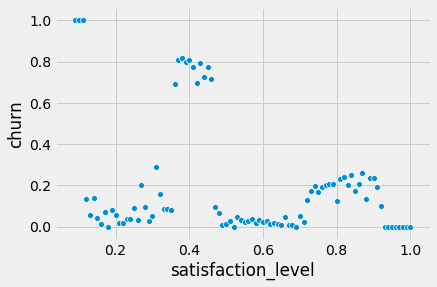

last_evaluation


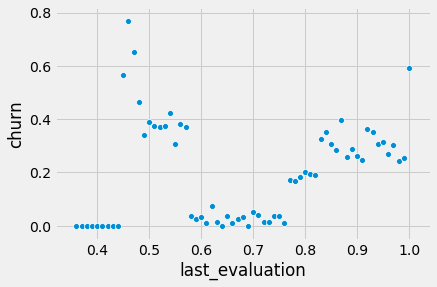

average_montly_hours


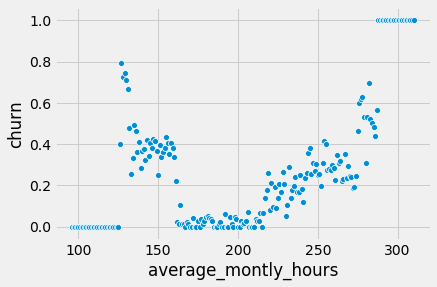

number_project


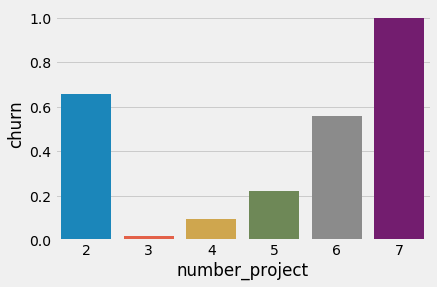

time_spend_company


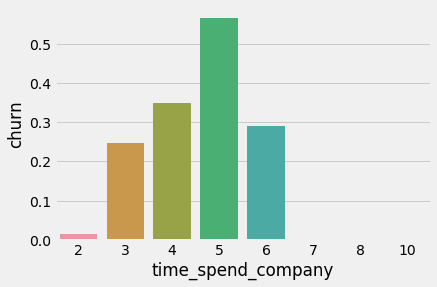

Work_accident


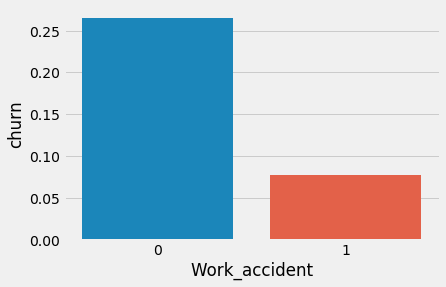

promotion_last_5years


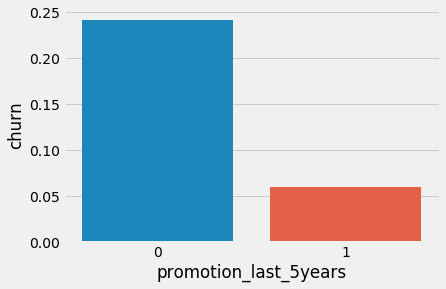

dept


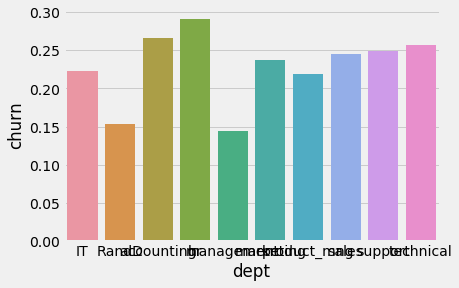

salary


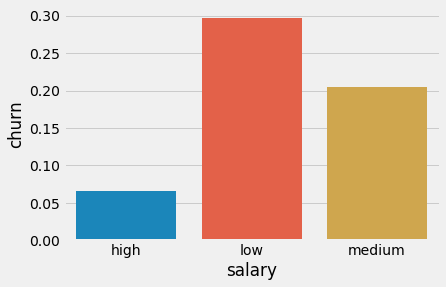

In [10]:
for col in features[num_columns]:
    print(col)
    sns.scatterplot(x=col,y='churn', data = df.groupby(col)['churn'].mean().reset_index())    
    plt.show()
    
for col in features[cat_columns]:
    print(col)
    sns.barplot(x=col,y='churn', data = df.groupby(col)['churn'].mean().reset_index())    
    plt.show()

- There is no trend between churn rate and satisfaction level
- There is no trend between churn rate and an employee's last evaluation
- There is no trend between churn rate and average monthly hours


- Employees with 7 projects all churn 
- After 5 years, employees are less likely to churn
- Employees with less work accidents have a higher churn rate
- Employees with less promotions in the past years have a higher churn rate
- R&D and management have a lower churn rate; HR has the highest rate of churn
- Low salary employees have a higher churn rate

## Group numerical columns by clustering

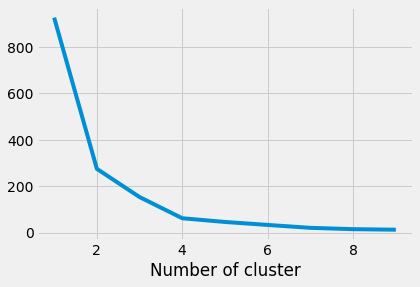

In [11]:
sse = {}
df_cluster = df[['satisfaction_level']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['satisfaction_level']])
df['sat_level_cluster'] = kmeans.predict(df[['satisfaction_level']])

In [13]:
df.groupby('sat_level_cluster')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
sat_level_cluster,,,,,,,,
0,4633.0,0.679361,0.064709,0.57,0.62,0.68,0.74,0.78
1,1941.0,0.155183,0.061473,0.09,0.10,0.13,0.20,0.30
2,3984.0,0.452093,0.067452,0.31,0.40,0.45,0.51,0.56
3,4441.0,0.887651,0.061710,0.79,0.83,0.89,0.94,1.00


In [14]:
df['sat_level_cluster'] = df['sat_level_cluster'].replace({1:'very unsatisfied',
                                                           2:'unsatisfied',
                                                           0:'satisfied',
                                                           3:'very satisfied'})

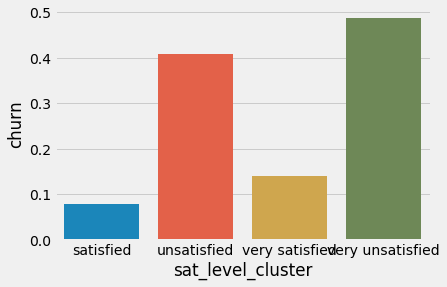

In [16]:
sns.barplot(x='sat_level_cluster',y='churn',data=df.groupby('sat_level_cluster')['churn'].mean().reset_index())

- unsatisfied and very unsatisfied employees have higher rate of churn 

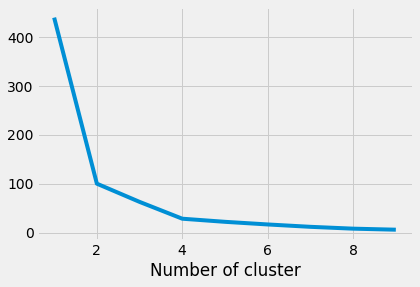

In [17]:
sse = {}
df_cluster = df[['last_evaluation']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['last_evaluation']])
df['last_eval_cluster'] = kmeans.predict(df[['last_evaluation']])

In [19]:
df.groupby('last_eval_cluster')['last_evaluation'].describe()

,count,mean,std,min,25%,50%,75%,max
last_eval_cluster,,,,,,,,
0,4118.0,0.928703,0.043407,0.86,0.89,0.93,0.97,1.00
1,3131.0,0.643098,0.039939,0.58,0.61,0.64,0.68,0.71
2,4262.0,0.505106,0.048529,0.36,0.48,0.51,0.54,0.57
3,3488.0,0.788449,0.040866,0.72,0.75,0.79,0.83,0.85


In [20]:
df['last_eval_cluster'] = df['last_eval_cluster'].replace({2:'low performance',
                                                           1:'average performance',
                                                           3:'high performance',
                                                           0:'very high performance'})

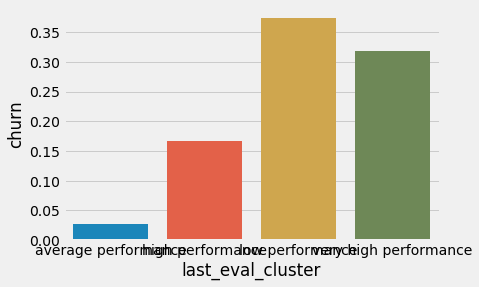

In [21]:
sns.barplot(x='last_eval_cluster',y='churn',data=df.groupby('last_eval_cluster')['churn'].mean().reset_index())

- low performance employees have the highest rate of churn
- interesting that average performance have a 2.5% rate of churn, meaning they rarely churn 

In [22]:
df.groupby('last_eval_cluster')['churn'].mean()

last_eval_cluster
average performance      0.026828
high performance         0.167431
low performance          0.374003
very high performance    0.317873
Name: churn, dtype: float64

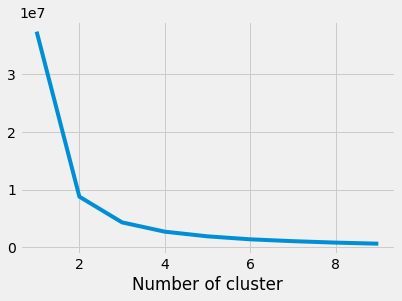

In [23]:
sse = {}
df_cluster = df[['average_montly_hours']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['average_montly_hours']])
df['avg_month_hr_cluster'] = kmeans.predict(df[['average_montly_hours']])

In [29]:
df.groupby('avg_month_hr_cluster')['average_montly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
avg_month_hr_cluster,,,,,,,,
0,4395.0,202.696701,16.424076,175.0,188.0,203.0,217.0,230.0
1,5104.0,258.326607,17.709606,231.0,244.0,257.0,269.0,310.0
2,5500.0,146.582364,16.793536,96.0,136.0,148.0,159.0,174.0


In [30]:
df['avg_month_hr_cluster'] = df['avg_month_hr_cluster'].replace({2:'low hr',
                                                                 0:'med hr',
                                                                 1:'high hr'})

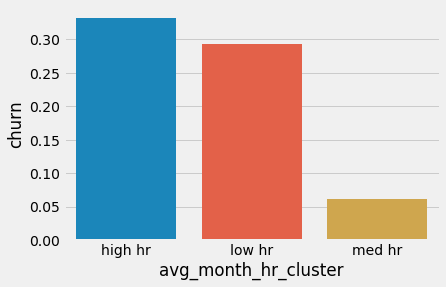

In [31]:
sns.barplot(x='avg_month_hr_cluster',y='churn',data=df.groupby('avg_month_hr_cluster')['churn'].mean().reset_index())

- Employees who are overworked or don't work enough hours have a higher rate of churn

In [32]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low hr
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,very high performance,high hr
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high hr
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,very high performance,med hr
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low hr


We've made 3 new features.

In [33]:
# PolynomialFeatures only makes sense to use with numerical variables
# Let's drop the categorical or useless variables (i.e. id)
X = df.drop(columns=['id',
                     'Work_accident', 
                     'churn', 
                     'promotion_last_5years', 
                     'dept', 
                     'salary', 
                     'sat_level_cluster',
                     'last_eval_cluster',
                     'avg_month_hr_cluster'])

In [34]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [35]:
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)

In [36]:
arr_poly = poly.fit_transform(X)

In [37]:
df_poly = pd.DataFrame(arr_poly)

In [38]:
df_poly.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.38,0.53,2.0,157.0,3.0,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,0.80,0.86,5.0,262.0,6.0,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,0.11,0.88,7.0,272.0,4.0,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,0.72,0.87,5.0,223.0,5.0,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,0.37,0.52,2.0,159.0,3.0,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [39]:
create_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X,p) for p in poly.powers_ ]]

In [40]:
df_poly.columns = create_feature_names

In [41]:
df_poly.columns

Index(['satisfaction_level^1', 'last_evaluation^1', 'number_project^1',
       'average_montly_hours^1', 'time_spend_company^1',
       'satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xtime_spend_company^1',
       'number_project^1xaverage_montly_hours^1',
       'number_project^1xtime_spend_company^1',
       'average_montly_hours^1xtime_spend_company^1'],
      dtype='object')

In [42]:
df_poly = df_poly.iloc[:,5:] #just the interaction terms

In [43]:
df_poly['id'] = df['id']

In [44]:
df_for_preprocessing = df.merge(df_poly) #merges on id

In [45]:
df_for_preprocessing.head() 

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,very high performance,high hr,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high hr,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,very high performance,med hr,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [46]:
df_for_preprocessing.shape

(14999, 24)

We've made 13 new feautures. Let's pre-process this data in another notebook. Don't forget to standardize the numerical features.

In [47]:
df_for_preprocessing.to_csv('df_for_preprocessing.csv', index=False)

## Feature Selection

In [48]:
df_for_preprocessing.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,very high performance,high hr,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high hr,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,very high performance,med hr,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


## Variance Threshold

In [49]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [50]:
df_num = df_for_preprocessing.drop(columns=['id',                       
                                            'Work_accident',
                                            'churn',
                                            'promotion_last_5years',
                                            'dept',
                                            'salary',
                                            'sat_level_cluster',
                                            'last_eval_cluster',
                                            'avg_month_hr_cluster'])

In [51]:
minmax_scaler = MinMaxScaler()
minmax = minmax_scaler.fit_transform(df_num)

In [52]:
minmax.var(axis=0)

array([0.07464446, 0.07152566, 0.0607673 , 0.05446211, 0.03331024,
       0.05575229, 0.04167423, 0.0517659 , 0.01835536, 0.04383645,
       0.04697235, 0.0202557 , 0.03774655, 0.02037429, 0.0197965 ])

In [53]:
selector = VarianceThreshold(threshold = 0.05)
selector.fit_transform(minmax)

array([[0.31868132, 0.265625  , 0.        , 0.28504673, 0.16219052,
        0.1725598 ],
       [0.78021978, 0.78125   , 0.6       , 0.77570093, 0.67268149,
        0.7294607 ],
       [0.02197802, 0.8125    , 1.        , 0.82242991, 0.05245489,
        0.06210073],
       ...,
       [0.30769231, 0.265625  , 0.        , 0.21962617, 0.1566303 ,
        0.14748923],
       [0.02197802, 0.9375    , 0.8       , 0.85981308, 0.06168695,
        0.06536919],
       [0.30769231, 0.25      , 0.        , 0.28971963, 0.15274864,
        0.16810281]])

In [54]:
selector.variances_.round(3)

array([0.075, 0.072, 0.061, 0.054, 0.033, 0.056, 0.042, 0.052, 0.018,
       0.044, 0.047, 0.02 , 0.038, 0.02 , 0.02 ])

In [55]:
#Which columns are these?
selector.get_support()

array([ True,  True,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False])

In [56]:
selector.get_support(indices = True)

array([0, 1, 2, 3, 5, 7])

In [58]:
#The columns chosen by variance threshold
df_num.columns[selector.get_support(indices = True)]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xaverage_montly_hours^1'],
      dtype='object')

## Chi-Sqaured

In [59]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [60]:
df_for_preprocessing.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,very high performance,high hr,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high hr,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,very high performance,med hr,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low hr,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [148]:
df_cat = df_for_preprocessing[[
                              'dept',
                              'salary',
                              'sat_level_cluster',
                              'last_eval_cluster',
                              'avg_month_hr_cluster',
                              'Work_accident',
                              #'churn',
                              'promotion_last_5years']]
nom_var = ['dept']

ord_var = ['salary',
           'sat_level_cluster',
           'last_eval_cluster',
           'avg_month_hr_cluster']

bin_var = ['Work_accident',
           'promotion_last_5years']

In [165]:
# We need to fit the OrdinalEncoder before splitting the dataset into training and testing because if a new value that never appears in the fit step needs to be converted in the transform step, OrdinalEncoder will raise an error

ord_categories = [['low','medium','high'],
                  ['very unsatisfied', 'unsatisfied', 'satisfied', 'very satisfied'],
                  ['low performance', 'average performance', 'high performance', 'very high performance'],
                  ['low hr', 'med hr', 'high hr']]

ord_encoder = OrdinalEncoder(categories=ord_categories)

In [166]:
df_ord = pd.DataFrame(ord_encoder.fit_transform(df_for_preprocessing[ord_var]))

In [167]:
df_ord.head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,1.0,3.0,3.0,2.0
2,1.0,0.0,3.0,2.0
3,0.0,2.0,3.0,1.0
4,0.0,1.0,0.0,0.0


In [168]:
#Let's compare to see if ordinalencoder encoded properly; everything matches!
df_for_preprocessing[ord_var].head()

,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster
0,low,unsatisfied,low performance,low hr
1,medium,very satisfied,very high performance,high hr
2,medium,very unsatisfied,very high performance,high hr
3,low,satisfied,very high performance,med hr
4,low,unsatisfied,low performance,low hr


In [170]:
df_for_preprocessing[ord_var] = df_ord

In [171]:
df_for_preprocessing.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,1.0,3.0,3.0,2.0,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,1.0,0.0,3.0,2.0,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,0.0,2.0,3.0,1.0,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,0.0,1.0,0.0,0.0,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [172]:
df_for_preprocessing.to_csv('df_for_preprocessing_ord.csv', index=False)

In [173]:
nominal_transformer = OneHotEncoder([
                                    ['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT',                                            'product_mng', 'marketing', 'RandD'],
                                    ])

In [174]:
preprocessor = ColumnTransformer(transformers = [
                                                #('scaler', num_transformer, num_var),
                                                ('onehot', nominal_transformer, nom_var),
                                                #('ordinal', new_OrdinalEncoder(cat), ord_var),
                                                ],
                                remainder = 'passthrough')

In [175]:
# Assign variables
X = df_for_preprocessing[['dept',
                         'salary',
                         'sat_level_cluster',
                         'last_eval_cluster',
                         'avg_month_hr_cluster',
                         'Work_accident',
                         'promotion_last_5years']]

y = df_for_preprocessing[['churn']]


#Test train split first
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [176]:
# Fitting the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the input validation and test sets
X_test_transformed = preprocessor.transform(X_test)

In [177]:
#Grab the column names for all of our nominal variables
one_hot_columns = preprocessor.named_transformers_.onehot.get_feature_names()

In [178]:
one_hot_columns

array(['x0_sales', 'x0_accounting', 'x0_hr', 'x0_technical', 'x0_support',
       'x0_management', 'x0_IT', 'x0_product_mng', 'x0_marketing',
       'x0_RandD'], dtype=object)

In [179]:
transformed_columns = list(one_hot_columns) + ord_var + bin_var

In [180]:
X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns)
X_test_transform_df = pd.DataFrame(X_test_transformed, columns = transformed_columns)

In [181]:
X_train.head()

,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,Work_accident,promotion_last_5years
12602,product_mng,0.0,0.0,2.0,2.0,0,0
4889,management,1.0,2.0,1.0,0.0,1,0
1572,technical,0.0,1.0,0.0,0.0,0,0
13375,IT,1.0,3.0,1.0,0.0,0,0
879,technical,1.0,3.0,3.0,2.0,0,0


In [182]:
X_train_transform_df.head()

,x0_sales,x0_accounting,x0_hr,x0_technical,x0_support,x0_management,x0_IT,x0_product_mng,x0_marketing,x0_RandD,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,0.0,0.0


In [183]:
#We need categorical data, so will change all the data to integers first
X_train_int = X_train_transform_df.astype(int)

In [204]:
selector_chi2 = SelectKBest(score_func = chi2, k = 10)
selector_chi2.fit(X_train_int, y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x7f39f6360620>)

In [205]:
#Chi2 scores
selector_chi2.scores_.round(2)

array([1.2600e+00, 2.8500e+00, 6.6500e+00, 4.5800e+00, 1.0000e-02,
       2.3120e+01, 2.2600e+00, 2.0000e-02, 7.2000e-01, 2.6870e+01,
       1.8141e+02, 6.6373e+02, 4.2200e+00, 1.3120e+01, 2.0961e+02,
       3.8920e+01])

In [206]:
#p-values
selector_chi2.pvalues_.round(2)

array([0.26, 0.09, 0.01, 0.03, 0.93, 0.  , 0.13, 0.89, 0.4 , 0.  , 0.  ,
       0.  , 0.04, 0.  , 0.  , 0.  ])

In [207]:
#Seeing which features are picked
selector_chi2.get_support()

array([False, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True])

In [208]:
#Getting the indices of the columns
selector_chi2.get_support(indices = True)

array([ 2,  3,  5,  9, 10, 11, 12, 13, 14, 15])

In [212]:
for num in selector_chi2.get_support(indices = True):
    print(transformed_columns[num])

x0_hr
x0_technical
x0_management
x0_RandD
salary
sat_level_cluster
last_eval_cluster
avg_month_hr_cluster
Work_accident
promotion_last_5years


In [210]:
transformed_columns[selector_chi2.get_support(indices = True)]

TypeError: only integer scalar arrays can be converted to a scalar index